## Assignment 6

## Abdelmalek Hajjam / Monu Chacko

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
Dataset.
Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html
What can you infer about the relationships between (1) the women, and (2) the social events?  

Please provide your code and analysis in an Jupyter notebook stored in your GitHub repository.

Background && Description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis
and also: http://rpackages.ianhowson.com/cran/latentnet/man/davis.html

Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat
        
Networkx has this dataset builtin already. It comes with it. We just need to load it (call it through networkx API).
        

In [21]:
import pandas as pd
import numpy as np
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
G = nx.davis_southern_women_graph()
Women = G.graph['top']
Events = G.graph['bottom']

In [43]:
#show women
print(Women)
#show events
print(Events)
print("There were " + str(len(Women)) + " women in total.")
print("There were " + str(len(events)) + " events in total.")

['Evelyn\nJefferson', 'Laura\nMandeville', 'Theresa\nAnderson', 'Brenda\nRogers', 'Charlotte\nMcDowd', 'Frances\nAnderson', 'Eleanor\nNye', 'Pearl\nOglethorpe', 'Ruth\nDeSand', 'Verne\nSanderson', 'Myra\nLiddel', 'Katherina\nRogers', 'Sylvia\nAvondale', 'Nora\nFayette', 'Helen\nLloyd', 'Dorothy\nMurchison', 'Olivia\nCarleton', 'Flora\nPrice']
['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']
There were 18 women in total.
There were 14 events in total.


In [40]:
#show the adjacency matrix
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, Women, Events))


Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [35]:
#adding color attribute to the nodes
for node in Women:
    G.node[node]["class"] = "woman"
for node in Events:
    G.node[node]["class"] = "event"
    
color_map = {
    "event": "#4db6ac",
    "woman": "#ff80ab"
}

In [36]:
#adding labels
label_map = {}
for event in Events:
    label_map[event] = event
for woman in Women:
    Women[Women.index(woman)] = woman.replace(" ", "\n")
    label_map[woman] = woman.replace(" ", "\n")
G = nx.relabel_nodes(G, label_map)

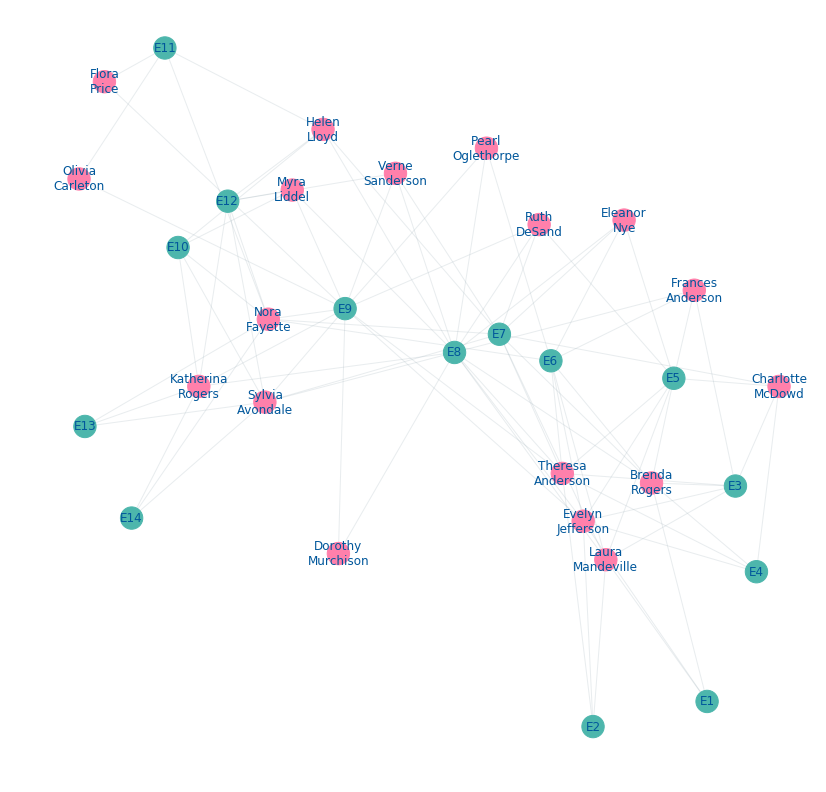

In [50]:
plt.figure(figsize=(14,14))
positions = nx.spring_layout(G,k=0.55,iterations=60)
position_labels = {}
keys = positions.keys()
for key in keys:
    px,py = positions[key]
    position_labels[key] = (px, py)
nx.draw_networkx_labels(G, position_labels, font_color='#01579b', font_size=12)
nx.draw_networkx_edges(G, positions, edge_color="#90a4ae", alpha=0.2)
nx.draw_networkx_nodes(G, positions, node_color=[color_map[G.node[node]['class']] for node in G], node_size=500)
plt.axis("off")
plt.show()

Eyeballing the graph, looks like E8 and E9 are the most events bringing women together, i.e. lot of women attended event8 and event9. Also it lloks like Theresa, Evelyn and Nora Fayette attended most events.

## Women Studies

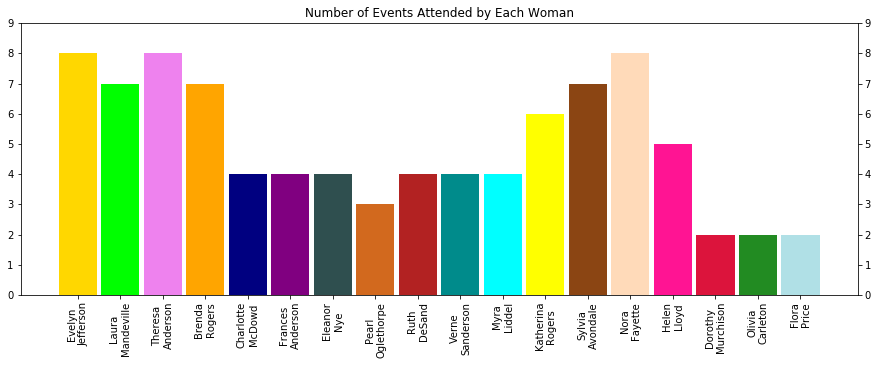

In [45]:
#graph number of events attended by every women
women_colors = {}
for woman in Women:
    women_colors[woman] = ["gold", "lime", "violet", "orange", "navy", "purple",
                          "darkslategrey", "chocolate", "firebrick", "darkcyan", "cyan", "yellow",
                          "saddlebrown", "peachpuff", "deeppink", "crimson", "forestgreen", "powderblue"][Women.index(woman)]
women_events = {}
for woman in Women:
    women_events[woman] = len(list(nx.all_neighbors(G, woman)))
plt.figure(figsize=(15,5))
plt.bar(women_events.keys(), women_events.values(), width=0.9, align="center", color=[women_colors[woman] for woman in Women])
plt.xticks(rotation=90)
plt.yticks(list(range(0,10)))
plt.tick_params(labelright=True, right=True)
plt.title("Number of Events Attended by Each Woman")
plt.show()

There are lot of variations in the number of events attended by every women.Some attended more events and some attended less events.
We can conclude that those 3 women Evelyn, Nora Fayette and Theresa have lot of frienships (more friends), since they attended most of the events.
While Dorothy, Olivia and Flora have few friends since they attended fewer events.

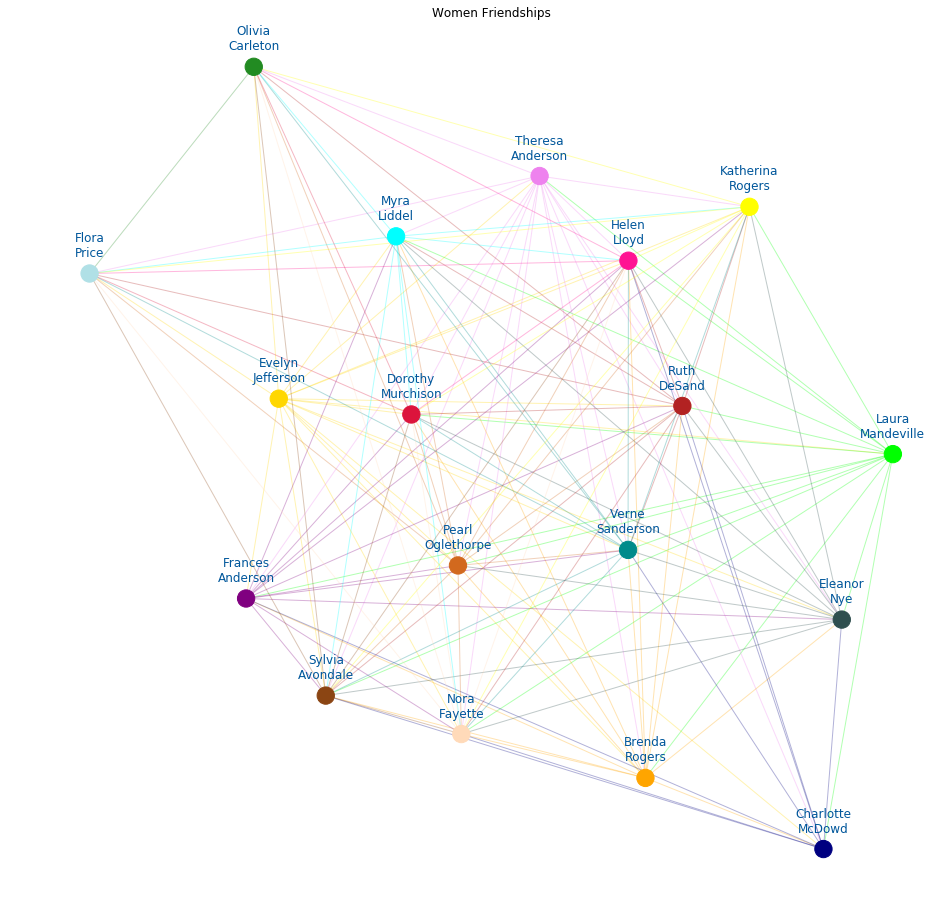

In [57]:
#the colored graph
W = bipartite.projected_graph(G, Women)
plt.figure(figsize=(16,16))
positions = nx.spring_layout(W,k=0.55,iterations=60)
position_labels = {}
keys = positions.keys()
for key in keys:
    px, py = positions[key]
    position_labels[key] = (px, py + 0.065)
nx.draw_networkx_labels(W, position_labels, font_color='#01579b', font_size=12)
nx.draw_networkx_edges(W, positions, edge_color=[women_colors[edge[0]] for edge in list(W.edges())], alpha=0.3)
nx.draw_networkx_nodes(W, positions, node_color=[women_colors[node] for node in W], node_size=300)
plt.axis("off")
plt.title("Women Friendships")
plt.show()


I tweaked the graph to make it very clear for frienships. Looking at the bipartite graph, these are women who attended events together. we can clearly see that Evelyn, Theresa and Nora Fayette, made friends with most of other women.

In [ ]:
Let compare Evelyn Jefferson and Olivia\nCarleton

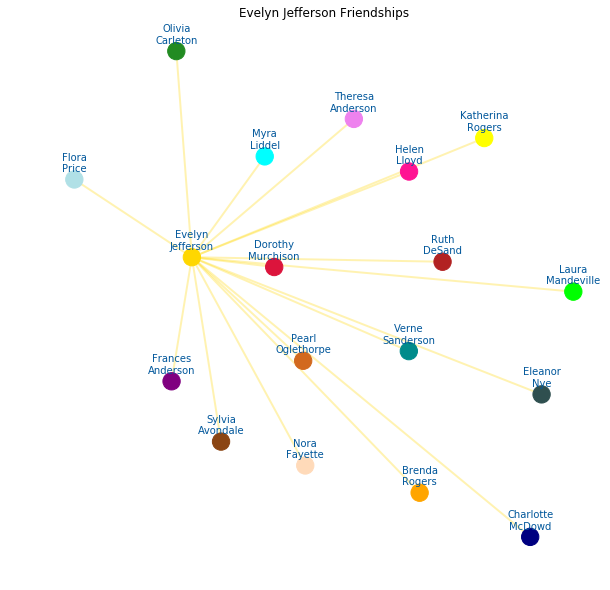

In [61]:
plt.figure(figsize=(10,10))
nx.draw_networkx_labels(W, position_labels, font_color='#01579b', font_size=10)
nx.draw_networkx_edges(W, positions, edgelist=[edge if "Evelyn\nJefferson" in edge else ("Evelyn\nJefferson", "Evelyn\nJefferson") for edge in list(W.edges())], edge_color=women_colors["Evelyn\nJefferson"], alpha=0.3, width=2)
nx.draw_networkx_nodes(W, positions, node_color=[women_colors[node] for node in W], node_size=300)
plt.axis("off")
plt.title("Evelyn Jefferson Friendships")
plt.show()

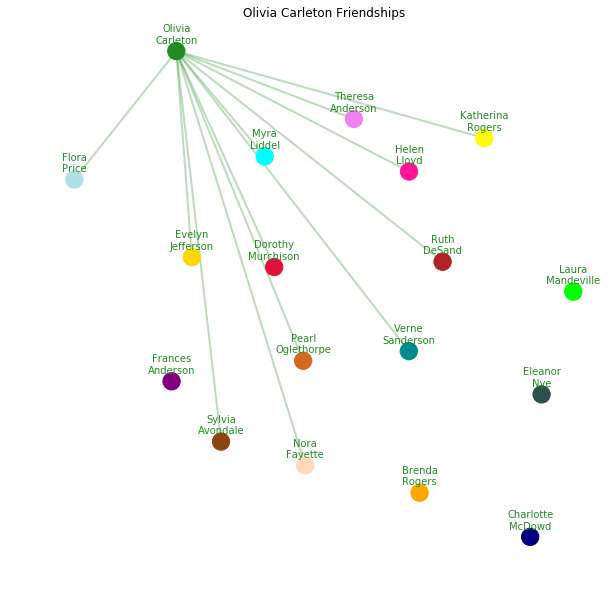

In [62]:
plt.figure(figsize=(10,10))
nx.draw_networkx_labels(W, position_labels, font_color='forestgreen', font_size=10)
nx.draw_networkx_edges(W, positions, edgelist=[edge if "Olivia\nCarleton" in edge else ("Olivia\nCarleton", "Olivia\nCarleton") for edge in list(W.edges())], edge_color=women_colors["Olivia\nCarleton"], alpha=0.3, width=2)
nx.draw_networkx_nodes(W, positions, node_color=[women_colors[node] for node in W], node_size=300)
plt.axis("off")
plt.title("Olivia Carleton Friendships")
plt.show()

## Events Studies

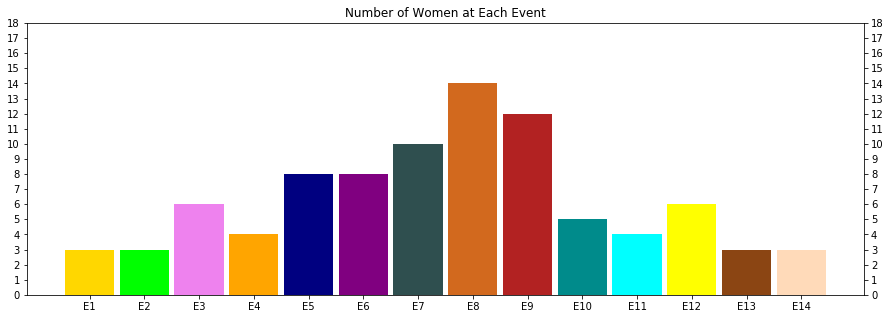

In [63]:
event_colors = {}
for event in Events:
    event_colors[event] = ["gold", "lime", "violet", "orange", "navy", "purple",
                          "darkslategrey", "chocolate", "firebrick", "darkcyan", "cyan", "yellow",
                          "saddlebrown", "peachpuff", "deeppink", "crimson", "forestgreen", "powderblue"][events.index(event)]
event_attendees = {}
for event in Events:
    event_attendees[event] = len(list(nx.all_neighbors(G, event)))
plt.figure(figsize=(15,5))
plt.bar(event_attendees.keys(), event_attendees.values(), width=0.9, align="center", color=[event_colors[event] for event in Events])
plt.yticks(list(range(0,19)))
plt.tick_params(labelright=True, right=True)
plt.title("Number of Women at Each Event")
plt.show()

It looks like a normal distribution if we look at the number of women who attended each event. 
It also look like the average number of women attending an event is about 6 women in average.
Also it look slike Event8 is the most event that lot of women have attended.
In oter word if you want an information to be advertised to women, you need advertise it in event8 (E8).


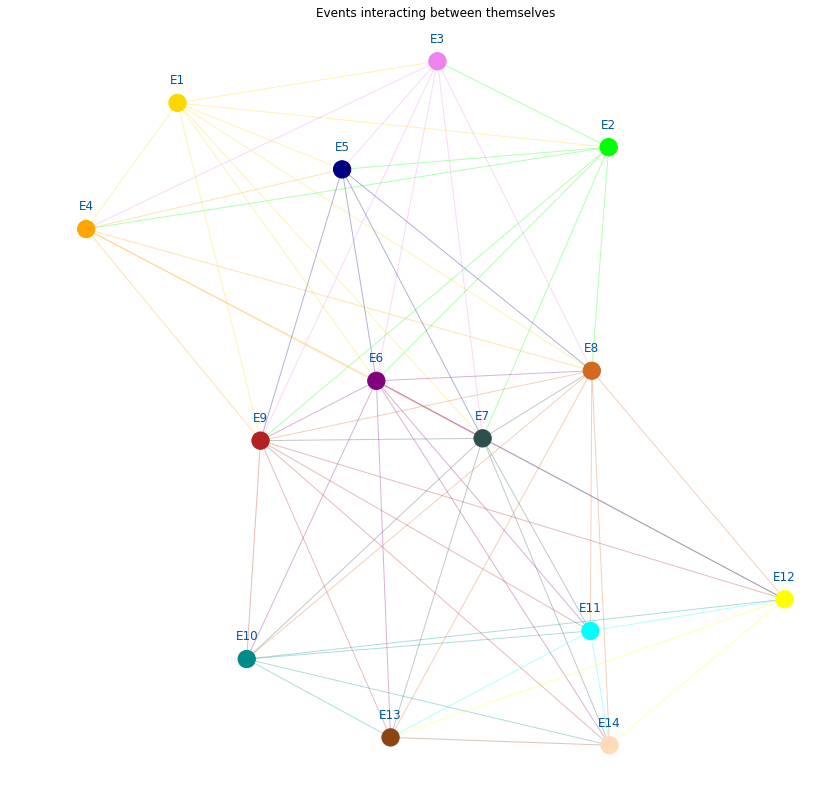

In [66]:
Ev = bipartite.projected_graph(G, Events)
plt.figure(figsize=(14,14))
positions = nx.spring_layout(Ev,k=0.55,iterations=60)
position_labels = {}
keys = positions.keys()
for key in keys:
    px, py = positions[key]
    position_labels[key] = (px, py + 0.065)
nx.draw_networkx_labels(Ev, position_labels, font_color='#01579b', font_size=12)
nx.draw_networkx_edges(Ev, positions, edge_color=[event_colors[edge[0]] for edge in list(Ev.edges())], alpha=0.3)
nx.draw_networkx_nodes(Ev, positions, node_color=[event_colors[node] for node in Ev], node_size=300)
plt.axis("off")
plt.title("Events interacting between themselves")
plt.show()

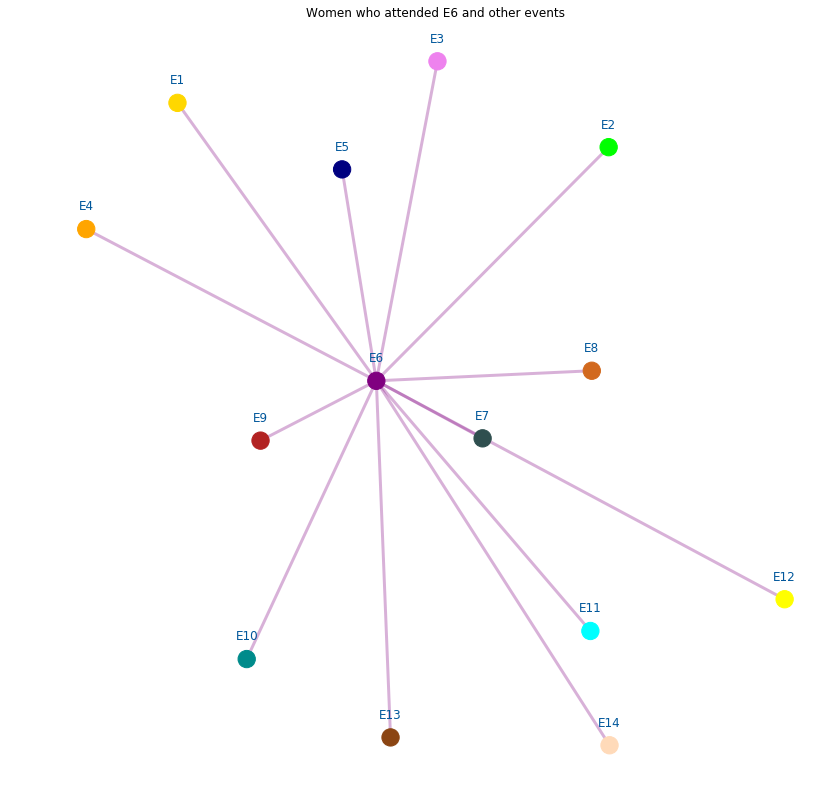

In [71]:
plt.figure(figsize=(14,14))
nx.draw_networkx_labels(Ev, position_labels, font_color='#01579b', font_size=12)
nx.draw_networkx_edges(Ev, positions, edgelist=[edge if "E6" in edge else ("E6", "E6") for edge in list(Ev.edges())], edge_color=event_colors["E6"], alpha=0.3, width=3)
nx.draw_networkx_nodes(Ev, positions, node_color=[event_colors[node] for node in Ev], node_size=300)
plt.axis("off")
plt.title("Women who attended E6 and other events")
plt.show()

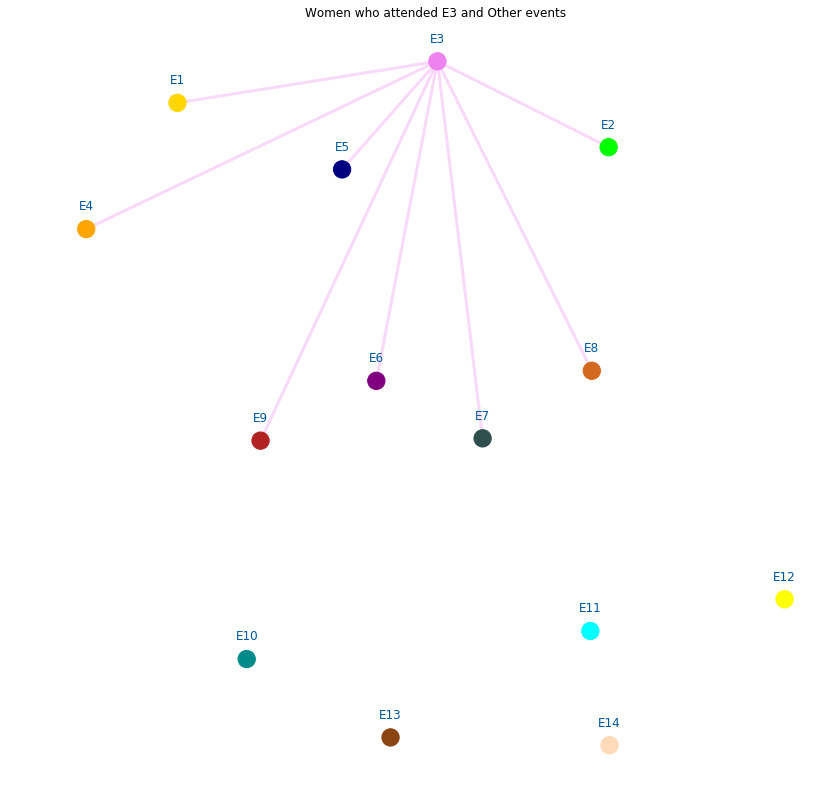

In [70]:
plt.figure(figsize=(14,14))
nx.draw_networkx_labels(Ev, position_labels, font_color='#01579b', font_size=12)
nx.draw_networkx_edges(Ev, positions, edgelist=[edge if "E3" in edge else ("E3", "E3") for edge in list(Ev.edges())], edge_color=event_colors["E3"], alpha=0.3, width=3)
nx.draw_networkx_nodes(Ev, positions, node_color=[event_colors[node] for node in Ev], node_size=300)
plt.axis("off")
plt.title("Women who attended E3 and Other events")
plt.show()

These 2 graphs above show how women who attended E6 and attended other events as well. Same for E3.
It looks like women who attended E6 also attended some other events. While there are lot of women who attended other events, but not E3. It looks like after E9, no women attend E3. Very strange. By graphing for each event, we can have a clear understanding of events interactions. 


## Conclusion:
## We can see that when we study women by themselves, and events by themselves, we get a good picture of the network and its analysis. However when we do 2-mode networks, it becomes difficult to do any analysis or reveal any hidden information. This is the purpose of 1-mode networks analysis. Lot of information can be revealed when we convert a network from 2-mode to 1-mode.